<a href="https://colab.research.google.com/github/lseidy/IA_learning/blob/main/ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Datasets/archive.zip

Archive:  /content/drive/MyDrive/Datasets/archive.zip
  inflating: Cars India Dataset.csv  


## Analise dos Dados

In [ ]:
import pandas as pd

cars_df = pd.read_csv("/content/Cars India Dataset.csv")
cars_df

,Model,Maker,Type,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,...,Rear Brake,Drive,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Emission Type,Tyre Size,Variants,NCAP Rating
0,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,19.40,BS VI,205/55 R16,3,Not Tested
1,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,18.12,BS VI,205/55 R16,2,Not Tested
2,Virtus,Volkswagen,Sedan,5,1498.0,4561,1752,1507,2651,4.0,...,Drum,2WD,5.05,45.0,521.0,18.67,BS VI,205/55 R16,1,Not Tested
3,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,19.20,BS VI,205/55 R17,3,5
4,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,17.23,BS VI,205/55 R17,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Harrier,Tata,SUV,5,1956.0,4598,1894,1706,2741,4.0,...,Drum,2WD,5.75,50.0,425.0,14.60,BS VI,235/70 R16,17,6
152,Safari,Tata,SUV,6,1956.0,4661,1894,1786,2741,4.0,...,Disc,2WD,5.80,50.0,447.0,16.14,BS VI,235/60 R18,2,6
153,Safari,Tata,SUV,6,1956.0,4661,1894,1786,2741,4.0,...,Disc,2WD,5.80,50.0,447.0,14.08,BS VI,235/60 R18,2,6
154,Safari,Tata,SUV,7,1956.0,4661,1894,1786,2741,4.0,...,Disc,2WD,5.80,50.0,447.0,16.14,BS VI,235/60 R18,20,6


<Axes: >

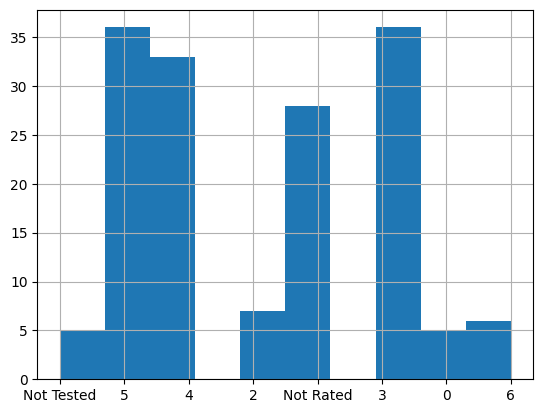

In [ ]:
cars_df["NCAP Rating"].hist()

In [ ]:
#Juntar Not Teste e Not Rated para uma variavel comum
cars_df['NCAP Rating'].replace('Not Tested', 'NA', inplace = True )
cars_df['NCAP Rating'].replace('Not Rated', 'NA', inplace = True )
cars_df['NCAP Rating']

0      NA
1      NA
2      NA
3       5
4       5
       ..
151     6
152     6
153     6
154     6
155     6
Name: NCAP Rating, Length: 156, dtype: object

In [ ]:
cars_df.describe()

,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Variants
count,156.000000,155.000000,156.000000,156.000000,156.000000,156.000000,155.000000,137.000000,155.000000,141.000000,133.000000,156.000000
mean,5.538462,1598.109677,4324.455128,1800.512821,1653.666667,2633.358974,3.870968,5.247080,48.725806,377.673759,18.028947,2.871795
std,1.018440,504.656969,325.767389,79.050452,125.170559,128.228372,0.389966,0.284181,10.997815,105.015951,3.273723,2.864055
min,2.000000,799.000000,3731.000000,1579.000000,1370.000000,2422.000000,3.000000,4.700000,28.000000,180.000000,9.000000,1.000000
25%,5.000000,1197.000000,3995.000000,1751.500000,1544.000000,2500.000000,4.000000,5.100000,40.000000,296.000000,16.200000,1.000000
50%,5.000000,1493.000000,4315.000000,1790.000000,1631.000000,2610.000000,4.000000,5.200000,50.000000,392.000000,18.100000,2.000000
75%,6.000000,1999.000000,4598.000000,1855.000000,1755.000000,2750.000000,4.000000,5.300000,57.000000,447.000000,20.250000,3.000000
max,9.000000,3799.000000,5115.000000,2099.000000,1995.000000,3060.000000,6.000000,5.900000,80.000000,625.000000,28.000000,20.000000


In [ ]:
#Retirada de elementos anormais
cars_df.drop(cars_df[cars_df['Fuel'] == 'Electric'].index, inplace = True)

In [ ]:
cars_df.to_csv('Data_cars.csv', sep =',')

## Pre Process

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test = train_test_split(cars_df, test_size=0.3, stratify=cars_df['NCAP Rating'],random_state=0)

In [ ]:
X_Train.isnull().sum()

Model                  0
Maker                  0
Type                   0
Seats                  0
Displacement           0
Length                 0
Width                  0
Height                 0
Wheelbase              0
No_of_Cylinders        0
Fuel                   0
Engine Type            0
Transmission           0
Front Brake            0
Rear Brake             0
Drive                  0
Turning Radius        11
Fuel Tank Capacity     0
Boot Space            10
Fuel Efficiency       13
Emission Type          0
Tyre Size              0
Variants               0
NCAP Rating            0
dtype: int64

In [ ]:
#Substituicao de valores faltantes

X_Train['Turning Radius'].fillna(X_Train['Turning Radius'].mean(), inplace = True)
X_Train['Boot Space'].fillna(X_Train['Boot Space'].mean(), inplace = True)
X_Train['Fuel Efficiency'].fillna(X_Train['Fuel Efficiency'].mean(), inplace = True)

X_Test['Turning Radius'].fillna(X_Test['Turning Radius'].mean(), inplace = True)
X_Test['Boot Space'].fillna(X_Test['Boot Space'].mean(), inplace = True)
X_Test['Fuel Efficiency'].fillna(X_Test['Fuel Efficiency'].mean(), inplace = True)

In [ ]:
atributes_cat = ['Boot Space', 'Turning Radius','Variants','Fuel Tank Capacity', 'Displacement', 'Length', 'Width','Height','Wheelbase']
atributes_off = ['Model', 'Engine Type','Turning Radius', 'Boot Space', 'Variants','Fuel Tank Capacity', 'Displacement', 'Length', 'Width','Height','Wheelbase','No_of_Cylinders']

In [ ]:
# Categorizacao dos dados em 3 Quantis achei melhor
for i in atributes_cat:
  X_Train["Categorical" + i], cut_bin = pd.qcut(X_Train[i],q = 3, labels=['Pequeno', 'Medio', 'Grande'],retbins=True)
  X_Test["Categorical" + i], cut_bin = pd.qcut(X_Test[i],q = 3, labels=['Pequeno', 'Medio', 'Grande'],retbins=True)

In [ ]:
X_Train.head()

,Model,Maker,Type,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,...,NCAP Rating,CategoricalBoot Space,CategoricalTurning Radius,CategoricalVariants,CategoricalFuel Tank Capacity,CategoricalDisplacement,CategoricalLength,CategoricalWidth,CategoricalHeight,CategoricalWheelbase
87,Grand i10 Nios,Hyundai,Hatchback,5,998.0,3805,1680,1520,2450,4.0,...,2,Pequeno,Pequeno,Medio,Pequeno,Pequeno,Pequeno,Pequeno,Pequeno,Pequeno
83,Glanza,Toyota,Hatchback,5,1197.0,3990,1745,1500,2520,4.0,...,NA,Pequeno,Pequeno,Grande,Pequeno,Pequeno,Pequeno,Pequeno,Pequeno,Pequeno
32,Triber,Renault,MUV,7,999.0,3991,1739,1643,2636,3.0,...,4,Grande,Grande,Grande,Pequeno,Pequeno,Pequeno,Pequeno,Medio,Medio
78,Fortuner,Toyota,SUV,7,2755.0,4795,1855,1835,2745,4.0,...,5,Pequeno,Grande,Pequeno,Grande,Grande,Grande,Grande,Grande,Medio
153,Safari,Tata,SUV,6,1956.0,4661,1894,1786,2741,4.0,...,6,Grande,Grande,Pequeno,Medio,Grande,Grande,Grande,Grande,Medio


In [ ]:
#Retirada dos atributos categoricados
for i in atributes_off:
  X_Train = X_Train.drop(i,axis=1)
  X_Test = X_Test.drop(i,axis=1)

In [ ]:
X_Train['Fuel Efficiency'].describe()

count    108.000000
mean      18.010421
std        3.242686
min        9.000000
25%       16.470000
50%       18.010421
75%       19.850000
max       28.000000
Name: Fuel Efficiency, dtype: float64

In [ ]:
#Esqueci desses em cima fiz aqui
X_Train["CategoricalFuelEfficiency"], cut_bin = pd.qcut(X_Train['Fuel Efficiency'],q = 3, labels=['Pequeno', 'Medio', 'Grande'],retbins=True)
X_Test["CategoricalFuelEfficiency"], cut_bin = pd.qcut(X_Test['Fuel Efficiency'],q = 3, labels=['Pequeno', 'Medio', 'Grande'],retbins=True)
X_Train["CategoricalFuelEfficiency"], cut_bin = pd.qcut(X_Train['Fuel Efficiency'],q = 3, labels=['Pequeno', 'Medio', 'Grande'],retbins=True)
X_Train = X_Train.drop(['Fuel Efficiency'],axis=1)
X_Test = X_Test.drop(['Fuel Efficiency'],axis=1)

In [ ]:
print(X_Train.isnull().sum())
print(X_Test.isnull().sum())
print(len(X_Train))
print(len(X_Test))

Maker                            0
Type                             0
Seats                            0
Fuel                             0
Transmission                     0
Front Brake                      0
Rear Brake                       0
Drive                            0
Emission Type                    0
Tyre Size                        0
NCAP Rating                      0
CategoricalBoot Space            0
CategoricalTurning Radius        0
CategoricalVariants              0
CategoricalFuel Tank Capacity    0
CategoricalDisplacement          0
CategoricalLength                0
CategoricalWidth                 0
CategoricalHeight                0
CategoricalWheelbase             0
CategoricalFuelEfficiency        0
dtype: int64
Maker                            0
Type                             0
Seats                            0
Fuel                             0
Transmission                     0
Front Brake                      0
Rear Brake                       0
Drive  

In [ ]:
X_Train.to_csv('X_Train_ID3.csv', sep = ',')
X_Test.to_csv('X_Test_ID3.csv', sep = ',')

In [ ]:
X_Train.columns

Index(['Maker', 'Type', 'Seats', 'Fuel', 'Transmission', 'Front Brake',
       'Rear Brake', 'Drive', 'Emission Type', 'Tyre Size', 'NCAP Rating',
       'CategoricalBoot Space', 'CategoricalTurning Radius',
       'CategoricalVariants', 'CategoricalFuel Tank Capacity',
       'CategoricalDisplacement', 'CategoricalLength', 'CategoricalWidth',
       'CategoricalHeight', 'CategoricalWheelbase',
       'CategoricalFuelEfficiency'],
      dtype='object')

In [ ]:
import numpy as np
from operator import itemgetter

#Classe que define o no da arvores com um dicionario para os nodos
class Node:
  def __init__(self,att=None,label=None):
    self.att = att
    self.label = label
    self.leafs = {}
  def add_leaf(self,value,leaf):
    self.leafs[value] = leaf

class ID3:
  def __init__(self):
    self.tree = None

  #Função para print
  def print_tree(self):
    if self.tree is None:
      raise Exception("The classifier must be trained before printing the tree.")

    self._print_node(self.tree, "")

  def _print_node(self, node, indent):
    if node.label is not None:
      print(indent + "- " + str(node.label))
    else:
      print(indent + "- " + str(node.att))
      for value, child in node.leafs.items():
          print(indent + "  " + str(value) + " ->", end=" ")
          self._print_node(child, indent + "    ")

  def entropy(self, S, index):

    values = itemgetter(*index)(S)
    entropy = 0

    #Calculo da entropia passando os valores unicos do conjunto passado
    for value in np.unique(values).astype(str):
      pi = len(S[S == value])/len(S)
      entropy = entropy - pi*np.log2(pi + 1e-8)
    return entropy

  def ganho(self, S, Target, att):
    values = S[att].unique()
    soma = 0

    entropy = self.entropy(Target, Target.index)

    for i in values:
      Sv = S[S[att]==i]
      pv = len(Sv) / len(S)
      Ev = self.entropy(Sv['NCAP Rating'],S[S[att]==i].index)
      soma = soma + pv*Ev

    return entropy - soma

  #define melhor atributo dentre os atributos ainda disponiveis baseado em seu ganho
  def choose_att(self, X_Train,Target,atts):
    gain = []

    for i in atts:
      ganho = self.ganho(X_Train, Target, i)
      gain.append(ganho)

    return atts[np.argmax(gain)]

  # retorna o indice que mais aparece
  def better_class(self, Target):
    return Target.value_counts()

  def construct(self, X_Train, Target, att):
    leaf = Node()

    if len(np.unique(Target)) == 1:
      leaf.label = Target.unique()
      return leaf

    if len(att) == 0:
      leaf.label = self.better_class(Target)
      return leaf

    better = self.choose_att(X_Train, Target, att)
    print(better)
    leaf.att = better

    #Exclui atributo anterior
    new_att = []
    for i in att:
      if i != better:
        new_att.append(i)

    att = new_att

    #Chama a função recursivamente para testar subarvores de um atributo
    for i in X_Train[better].unique():
      n_train_set = X_Train[X_Train[better] == i]
      n_targ_set = Target[X_Train[better] == i]

      if len(n_train_set) == 0:
        seed = Node(label = self.better_class(Target))
      else:
        seed = self.construct(n_train_set,n_targ_set, att)

      leaf.add_leaf(i, seed)

    return leaf

  #caminha entre os nodos da arvore
  def navigate(self, test, leaf):
        if leaf.label is not None:
          return leaf.label

        value = test[leaf.att]

        if value not in leaf.leafs:
          return "NA"

        next = leaf.leafs[value]
        return self.navigate(test, next)
  def get_tree(self):
    return self.tree
  # Testa
  def fit(self, X_Train, Target):
    att = X_Train.drop('NCAP Rating', axis=1).columns
    self.tree = self.construct(X_Train, Target, att)
  def predict(self, Y_test):
      predictions = []
      for i in range(0,len(Y_test)):
        prediction = self.navigate(Y_test.iloc[i], self.tree)
        predictions.append(prediction)

      return np.array(predictions, dtype=object)


In [ ]:
train = ID3()

X_Train = pd.read_csv('/content/X_Train_ID3.csv')
X_Train = X_Train.drop('Unnamed: 0', axis=1)
X_Train = X_Train.drop('Maker', axis=1)
X_Train['NCAP Rating'].fillna("NA", inplace=True)
train.fit(X_Train, X_Train['NCAP Rating'].astype(str))

train.print_tree()

Tyre Size
Type
Type
Seats
Fuel
Transmission
Front Brake
Rear Brake
Drive
Emission Type
CategoricalBoot Space
Transmission
Fuel
Transmission
Front Brake
Rear Brake
Drive
Emission Type
CategoricalBoot Space
Type
Type
Seats
Fuel
Transmission
Front Brake
Rear Brake
Drive
Emission Type
CategoricalBoot Space
CategoricalTurning Radius
CategoricalVariants
Type
Type
- Tyre Size
  175/60 R15 ->     - Type
      Hatchback ->         - ['2.0']
      Compact Sedan ->         - ['NA']
  185/65 R16 ->     - ['NA']
  185/65 R15 ->     - ['4.0']
  265/65 R17 ->     - ['5.0']
  235/60 R18 ->     - Type
      SUV ->         - Seats
          6 ->             - ['6.0']
          5 ->             - Fuel
              Petrol ->                 - Transmission
                  6 AT ->                     - Front Brake
                      Disc ->                         - Rear Brake
                          Disc ->                             - Drive
                              2WD ->                    

In [ ]:
Y_Test = pd.read_csv('/content/X_Test_ID3.csv')
Y_Test = Y_Test.drop('Unnamed: 0', axis=1)
Y_Test = Y_Test.drop('Maker', axis=1)
Y_Test['NCAP Rating'].fillna("NA", inplace=True)
Y = np.array(Y_Test['NCAP Rating'])
Y_Test = Y_Test.drop('NCAP Rating', axis=1)
x = train.predict(Y_Test)

predict =[]
for i in x:
  if isinstance(i, np.ndarray):
    predict.append(i.item())
  else:
    predict.append(i)

predict = list(predict)
Y = list(Y)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

accuracy_score(Y, predict)

0.851063829787234

In [ ]:
print(classification_report(Y, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         3.0       1.00      0.91      0.95        11
         4.0       1.00      0.70      0.82        10
         5.0       1.00      0.73      0.84        11
         6.0       0.67      1.00      0.80         2
          NA       0.62      1.00      0.77        10

    accuracy                           0.85        47
   macro avg       0.90      0.91      0.88        47
weighted avg       0.91      0.85      0.86        47



In [ ]:
confusion_matrix(Y, predict)

TypeError: ignored

## Relatorio

A Arvore ID3 aprensentada possui acuracia de 85.10%, para implementação dela atributos como Model, Maker e Engine Type foram retiradas por ter ganho de informação muito elevado, o que criaria um viés para a implementação.
Além disso, pode se observar que para o conjunto de teste a arvore gerada encontrou alguns problemas na classificação para notas 4 e 5 que podem ter sido possivelmente geradas por falta de exemplares dos dados no conjunto de treinamento